In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_yolo_segmentation(image_path, label_path):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found: {image_path}")
    h, w = image.shape[:2]

    # Read label file
    with open(label_path, 'r') as f:
        lines = f.readlines()

    # Draw polygons
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        coords = list(map(float, parts[1:]))
        polygon = np.array(coords, dtype=np.float32).reshape(-1, 2)
        polygon *= np.array([[w, h]])  # denormalize
        polygon = polygon.astype(np.int32)

        cv2.polylines(image, [polygon], isClosed=True, color=(0, 255, 0), thickness=2)
        cv2.putText(image, str(class_id), tuple(polygon[0]),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # Convert BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display
    plt.figure(figsize=(10, 6))
    plt.imshow(image_rgb)
    plt.title(f"Image: {image_path}")
    plt.axis('off')
    plt.show()


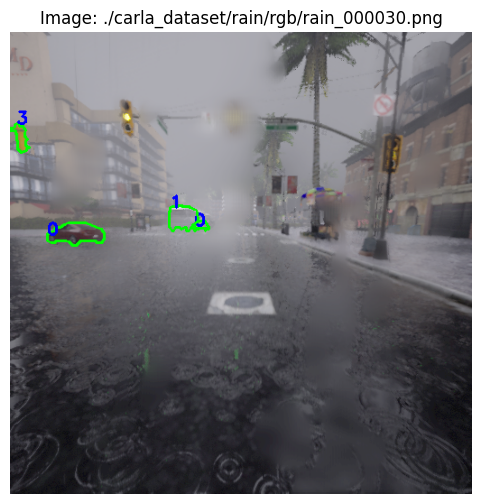

In [10]:

image_path = "./carla_dataset/rain/rgb/rain_000030.png"
label_path = "./carla_dataset/rain/annotations/rain_000030.txt"

visualize_yolo_segmentation(image_path, label_path)